Dylan Meyer - 12/10/19

A module was created to handle the majority of the functions. However, the main datasets are loaded within this notebook for any required ad-hoc data analysis.

In [28]:
# The following was found at http://blog.nextgenetics.net/?e=102 and is
#     a means by which you can hide coding cells and only show output to make the code look cleaner

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import spacy
sys.path.append('scripts')
from scripts.cleansing import cleanse
raw_dat = pd.read_csv('cleansing/data/appstore_games.csv')
raw_dat.drop_duplicates(subset='ID', inplace = True)
cleansed_dat = pd.read_parquet('cleansing/data/parsed_data.parquet')
text_sim_set = pd.read_csv('cleansing/data/text_sim_set-11-30-19.csv')
clean = cleanse()

import ast
text_sim_set['desc_parsed_text'] = text_sim_set['desc_parsed_text'].apply(lambda x: ast.literal_eval(x))

/anaconda/lib/python3.6/site-packages/pyarrow/pandas_compat.py:707: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/anaconda/lib/python3.6/site-packages/pyarrow/pandas_compat.py:734: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/anaconda/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


module loaded


## Itunes App Data

<img class="lz loaded" src="https://www.macworld.co.uk/cmsdata/slideshow/3592208/thumb_thumb800.jpg" data-src="https://www.macworld.co.uk/cmsdata/slideshow/3592208/thumb_thumb800.jpg" alt="thumb" data-alt="thumb">

Any modern phone comes out-of-the-box with an arsanal of applications for daily use. Additionally, phone-owners can easily find hundreds of additional __Apps__ for install. Many are purely recreational, while others help users accomplish specific medial or complicated tasks.

In order to understand Phone Apps in more depth a dataset was obtained from [Kaggle.com](https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games). The data provisioner used the Itunes API to gather this information on Aug 3, 2019 and contains mostly information concerning Games.

It is worth noting that this is a sample of the entire App-space as only Itunes-specific information is contained in the dataset. Additionally, although there are apps which are not solely under the "Games" category, games are the dominant category within the data.

The Data appears as follows:

| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| URL | _URL location of the app_ | N/A |
| ID | _ID Specific to the App_ | N/A |
| Name | _Name of the App_ | N/A | 
| Subtitle | _App Subtitle_ | N/A |
| Icon URL | _URL for the icon representing the app_ | N/A |
| Average User Rating | _Average Rating given by users for the app_ | N/A |
| User Rating Count | _Number of ratings submitted for the app_ | N/A |
| Price | _Cost to purchase the app_ | N/A |
| In-app Purchases | _Dollar amount of the potential items which can be purchased from within the app_ | N/A |
| Description | _Description of the App_ | N/A |
| Developer | _Studio who developed the App_ | N/A |
| Age Rating | _Intended Audience age for the App_ | N/A |
| Languages | _Languages supported within the App_ | N/A |
| Size | _Memory needed on device in order to install the App_ | N/A |
| Primary Genre | _Main Genre of the App_ | N/A |
| Genres | _All genres the App can be classified as_ | N/A |
| Original Release Date | _Date of initial release of the App_ | N/A |
| Current Version Release Date | _Latest update release date of the App_ | N/A |

An example is shown below:

In [25]:
raw_dat.head(2)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,true_free
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purple127/v4/7d/23/c6/7d23c660-aba8-308a-05c0-19385a377...,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download one of our Sudoku games today!\n\nMakers of the Be...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES, SV, ZH",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,False
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purple128/v4/f7/e8/10/f7e810c8-72b4-cd85-e2d3-fbcb1e3ef...,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Othello, is a much-loved strategy board game. It is o...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,False


## Placeholder: null in data

## Part 1: Initial Look at Data

#### i) Rating Data

One of the more interesting features of this dataset is the ample amount of ratings. 

As an initial look, a histogram was created to view the distribution of the data. This was done both by binning the ratings into intervals of one full point (0-1, 1-2, etc.), as well as looking at the dataset as a whole without binning. The initial __histogram with binned ratings showed that ratings of four and higher are by far the most common__. More specifically, the followup __histogram without binning showed that ratings between 4.25 and 4.5 are the most common overall__.

Plots for Ratings Data


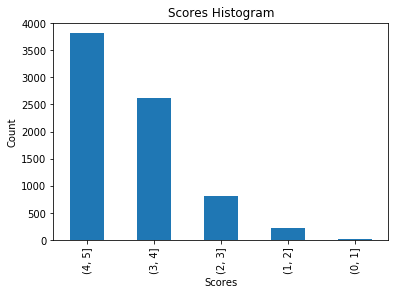

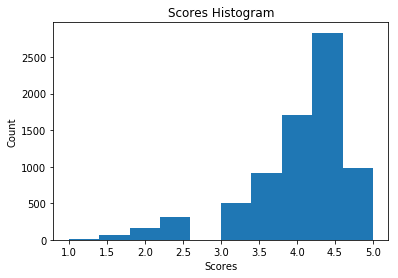

In [2]:
clean.visualize_raw_dat_ratings(raw_dat)

#### ii) Review Counts

Although there is a myriad of ratings across the Apps, it is also interesting to note __how many reviews came from each App__. In order to explore this, additional histograms were created. The initial chart proved to be not as useful as hoped due to a skewed distribution with a very long tail. A subset of the data was provisioned which shows a more useful view.

Number of Reviews


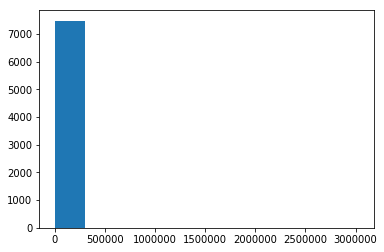

There is a long-tail to the data, so a subset will be shown as well
~80% of the data is pictured below


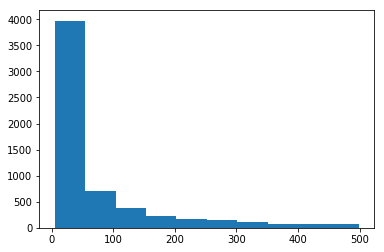

In [3]:
clean.visualize_raw_dat_rating_cnt(raw_dat)

#### iii) Pricing Information

There was very granular pricing information available for the Apps as well. Both the __initial price, as well as in-app-purchase information__ was available for each App. 

In leveraging this data, the rating for free and non-free can be compared. Additionally, a new field, __"truly_free" was created which distinguises between free apps without in-app purchases and all others__. This can be used to further disect the ratings data by grouping to see which are the most succesful in terms of user experiance.

Investigate differences in ratings by free vs. paid App


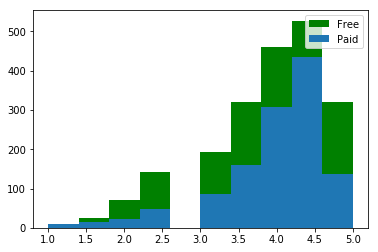

Many Apps included pain content within them. These should not truly be considered "free"


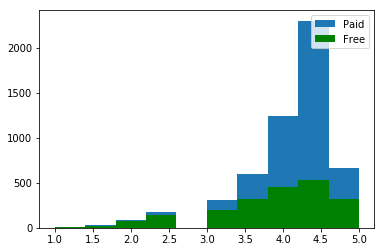

Which are truly best?


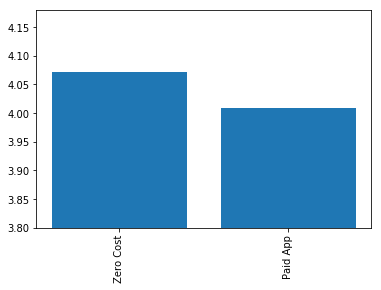

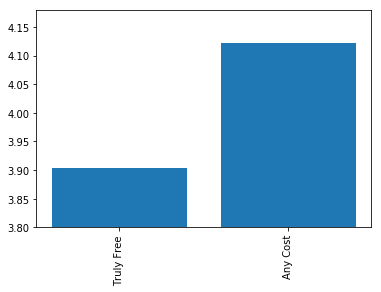

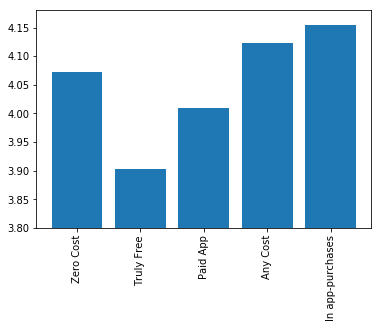

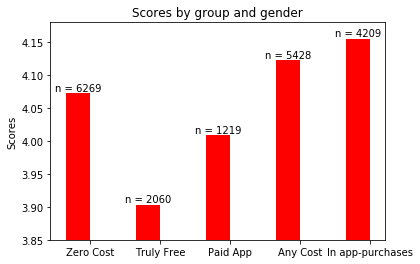

In [4]:
clean.prep_visualize_cost(raw_dat)

Oddly enough, it appears that games which are truly free are actually the lowest rated overall. The final two hiostograms do not contain disjoint sets, however the preceding graphs tell the same story. It is possible that this is due to lower quality Apps since there may be less money being put into them.

Alternatively, many truly free games are known to spam ads to users as their only means of income. This can create a worse user experiance and lead to lower ratings.

#### iv) Release/Update Dates

All applications go through a life-cycle in which they are refined. In this dataset we have access to the initial release date, and latest update date for each App. By treating today's date as a baseline we can see the days since last update to get an estimate of how "fresh" or well-supported an App is. In theory, those which are well-supported will have had a relatively recent release, whereas those without much of a popular following will not have been updated recently. 

Additionally, it would be interesting to view the differences in App rating over time since their last release. This is done below by specifying the number of equally sized bins to see average ratings over time with differing granularity. The closer to the left a bar is, the more recent partition of the data it represents. 

Loading previously parsed file from ../data/parsed_data.parquet


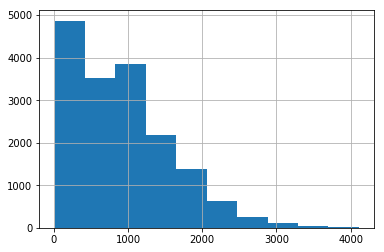

Segmenting data with 10 bins


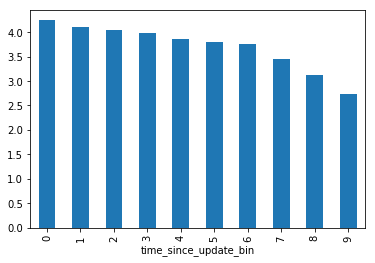

In [7]:
clean.time_since_update_stats(cleansed_dat, num_bins=10)

# Part 2: Image and Description Parsing

The initial evaluation of the App data was informative, but did not utilize both the url for the __App icon and the App description text__ due to their inherant complexity. However, adding the ability to leverage these fields would be more interesting and extensible into other datasets. Therefore, I chose to forgo a continuation into the analysis conducted above and instead address the following questions:

1. Can the Icon for an app be used to recommend another to you? Is it best to "choose a similar app by its cover"?
2. Can the description text be parsed into something meaningful? Once this is accomplished can we segment Apps by rating and view similarities and differences?



#### i) Image Retrievel

The raw data does not come with the icons for each App. Instead it supplies users with URLs, which lead to the icons. In order to retrieve the icons the __requests libray__ was utilized. However, once retrieved this data does not make sense without additional parsing. An example of this is shown below:

In [8]:
req = requests.get(raw_dat.iloc[0]['Icon URL'])
req_content = req.content
req.close()
print(req_content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x00hExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x01\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\x1a\x00\x00\x00\x00\x00\x04\x92\x86\x00\x07\x00\x00\x00\x10\x00\x00\x00P\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x02\x00\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02\x00\x00\x00\x00\x00ASCII\x00\x00\x00mage 19M\xff\xed\x008Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xd4\x1d\x8c\xd9\x8f\x00\xb2\x04\xe9\x80\t\x98\xec\xf8B~\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDE

The image was retrieved sucessfully, however the response is in __byte code__. This data was retrieved for every URL over the span of approximately half a day and then saved for later reuse.

Once all byte code was gathered the  __io library__ read the byte code, and the __PIL library__ then parsed the byte code into an image for display. This transformation will be applied to the byte code above:

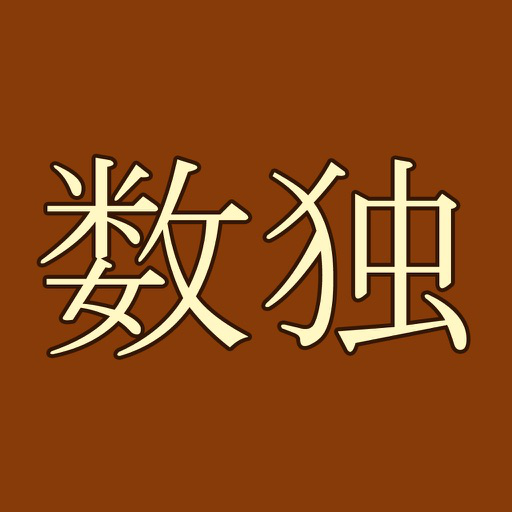

In [9]:
Image.open(BytesIO(req_content))

The image above is actually the icon for Sudoku! 

#### ii) Image Comparison

Now that this data is human-decipherable we can attempt to recommend Apps based on similar icons. In order to do this __each icon is represented as a matrix in which each entry is a pixel__. By doing this a __pixel-by-pixel comparison__ can be conducted to get an initial sense of how similar/different each image is with each other.

At present this calculation is done at runtime rather than being saved one off. This is due to the computation time needed to run from start to finish. Instead, this is conducted one-off for a single image at a time. Additionally, any row with a null value was removed from the dataframe which was leveraged. This was again due to the need to make the run-time operation more performant. This can be scaled up in the future to make it so all of the data can be leveraged.

### Unhide the cell below to try the walkthrough for this!

In [10]:
clean.visualize_image_sim(cleansed_dat)

Please Specify an Appsolitaire
------------------------
The most similar items in this set are City Island 2: Building Story, Quick Math - Multiplication Table & Arithmetic Game, Chess Prime please specify which you are interested inChess Prime
------------------------
Looking for Chess Prime
------------------------
Icon for chosen App will be Displayed in pop-up
------------------------
Gathering Similar Images
------------------------
Top image similarities are Chess - Play & Learn, Instant Chess, Find & Destroy: Tanks Strategy
------------------------
Would you like to view the images? Y/NY
------------------------
Images displayed


Depending on which app is chosen we see varying degrees of sucess in terms of the Image similarity. However, as intended, we also see that __it is not a very good idea to pick a new app based solely on similar icons__.

#### iii) Description Parsing

Now that we have "compared an App by its cover" it's time to pre-process its description text. 

The Description field had many issues which made it unusable "out of the box". These issues will be displayed by following the parsing steps of a mobile App I have on my own phone and should probably delete for my own good.

In [11]:
txt = raw_dat.loc[4670]['Description']
txt

'Live your Star Wars\\u2122 dreams as you fight with your favorite dark and light side heroes across iconic locations to become master of the galaxy. Create and customize your dream squad using characters from every era, including new characters from Solo\\u2122: A Star Wars\\u2122 Story, Star Wars\\u2122: The Last Jedi\\u2122, and Rogue One\\u2122: A Star Wars\\u2122 Story. Engage in turn-based RPG warfare, confront giant bosses, pilot legendary ships in space like the Millennium Falcon, and take your strategy to the next level!\\n\\nCREATE THE ULTIMATE TEAM\\nRebel leaders? Imperial stalwarts? You\\u2019re free to choose as you construct elite light and dark side teams while collecting heroes and other characters from the Star Wars\\u2122 universe. Develop your strategy and make key moves in this epic RPG. Pick teammates with complementary abilities and go to war with unbeatable squads!\\n\\nBECOME MASTER OF THE GALAXY\\nDefeat opponents and rise to the top as you dominate the galact

Obviously, a lot of this text is incomprehensible. Much of this is due to the '\' character and what follows it. As this is the 'escape' character in Python, this is expected. However, we also see additional cases in which this is due to unicode in the string.

In [12]:
cleaned_desc = clean.desc_cleanser(txt)
cleaned_desc

'Live your Star Wars dreams as you fight with your favorite dark and light side heroes across iconic locations to become master of the galaxy. Create and customize your dream squad using characters from every era including new characters from Solo A Star Wars Story Star Wars The Last Jedi and Rogue One A Star Wars Story. Engage in turnbased RPG warfare confront giant bosses pilot legendary ships in space like the Millennium Falcon and take your strategy to the next level! CREATE THE ULTIMATE TEAM Rebel leaders? Imperial stalwarts? Youre free to choose as you construct elite light and dark side teams while collecting heroes and other characters from the Star Wars universe. Develop your strategy and make key moves in this epic RPG. Pick teammates with complementary abilities and go to war with unbeatable squads! BECOME MASTER OF THE GALAXY Defeat opponents and rise to the top as you dominate the galactic hologames based in a faroff cantina. Improve your combat strategy by upgrading your 

In addition to removing the obvious problems, most non-alphanumeric characters were also removed as these will not be used in most nlp processes. End of sentence identifiers were left for now as this is something to potentially leverage at a later point and helps with readability.

#### iv) Parse Text

For an initial look at the description field word clouds will be generated for various subsets of the descriptions. Prior to doing this stopwords will be removed leveraging the __Spacy library__. 

As Spacy has many other utilities at its disposal, the parts of speech and NER (Natural Entity Recognition) tags were also extracted for potential later use.

This turns the text above into the following:

In [13]:
nlp = spacy.load("en_core_web_sm")

In [14]:
print('Lemmatized Text')
' '.join([i.lemma_.lower() for i in nlp(cleaned_desc) if (i.is_stop == False and i.is_alpha == True)])

Lemmatized Text


'live star wars dream fight favorite dark light hero iconic location master galaxy create customize dream squad character era include new character solo star wars story star war jedi rogue star wars story engage turnbase rpg warfare confront giant boss pilot legendary ship space like millennium falcon strategy level create ultimate team rebel leader imperial stalwart free choose construct elite light dark team collect hero character star wars universe develop strategy key move epic rpg pick teammate complementary ability war unbeatable squad master galaxy defeat opponent rise dominate galactic hologame base faroff cantina improve combat strategy upgrade hero ability play powerful attack big win fight player squad cantina battles pvp squad arena squad tournaments conquer galaxy play powerful champion smart tactical decision equip hero cool gear enhance damage unlock fun ability team unstoppable unleash command move like luke skywalkers destined strike darth vaders force crush young han 

In [15]:
print('Parts of Speech')
' '.join([i.pos_ for i in nlp(cleaned_desc) if (i.is_stop == False and i.is_alpha == True)])

Parts of Speech


'VERB PROPN PROPN VERB VERB ADJ ADJ ADJ NOUN ADJ NOUN NOUN NOUN VERB VERB NOUN NOUN NOUN NOUN VERB ADJ NOUN PROPN PROPN PROPN PROPN PROPN VERB PROPN PROPN PROPN PROPN PROPN VERB VERB ADJ NOUN NOUN ADJ NOUN VERB ADJ NOUN NOUN ADP PROPN PROPN NOUN NOUN VERB ADJ PROPN PROPN NOUN ADJ NOUN ADJ VERB VERB ADJ NOUN ADJ NOUN VERB NOUN NOUN PROPN PROPN NOUN VERB NOUN ADJ NOUN NOUN NOUN VERB VERB ADJ NOUN NOUN ADJ NOUN PROPN PROPN PROPN NOUN VERB VERB ADJ NOUN VERB NOUN NOUN VERB NOUN NOUN VERB NOUN NOUN VERB ADJ NOUN ADJ NOUN VERB NOUN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN VERB NOUN NOUN NOUN NOUN ADJ ADJ NOUN VERB NOUN ADJ NOUN VERB NOUN ADJ ADJ NOUN NOUN ADJ VERB VERB NOUN ADP PROPN PROPN PROPN NOUN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN ADJ NOUN VERB PROPN PROPN ADJ PROPN PROPN ADP PROPN PROPN PROPN VERB NOUN NOUN NOUN ADJ NOUN NOUN NOUN NOUN VERB NOUN NOUN ADJ NOUN NOUN ADJ ADJ NOUN VERB PROPN PROPN VERB NOUN VERB ADJ NOUN NOUN NOUN ADJ 

In [16]:
print('Entities')
' '.join([i.ent_type_  for i in nlp(cleaned_desc) if (i.is_stop == False and i.is_alpha == True and i.ent_type_ != '')])

Entities


'ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG PERSON ORG ORG ORG ORG ORG ORG PERSON PERSON PERSON PERSON PERSON PERSON NORP ORG ORG ORG ORG FAC FAC PERSON ORG ORG ORG ORG ORG PERSON EVENT EVENT DATE'

#### v) Word Clouds

Now that only the most meaningful text remains __Word Clouds__ will be used to visualize the textual content of the Descriptions. A Word Cloud will display the top occuring words or phrases in a batch of text, changing the size of the words to represent the number of occurances. 

The __WordCloud Library__ makes this visualizations far easier to accomplish. The first two clouds will be for the __descriptions of Apps with Ratings greater than or equal to 4, and those with less than 4__.

In [17]:
high_scores = ' '.join(text_sim_set[text_sim_set['Average User Rating'] >= 4].desc_parsed_text.apply(
    lambda x: ' '.join(x)))
lower_scores = ' '.join(text_sim_set[text_sim_set['Average User Rating'] < 4].desc_parsed_text.apply(
    lambda x: ' '.join(x)))

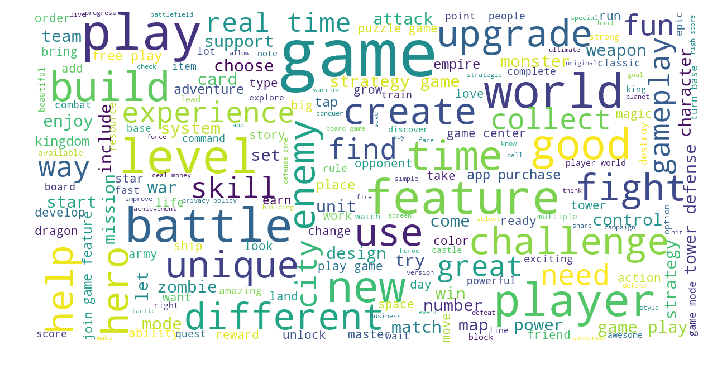

In [18]:
clean.show_wordcloud(high_scores)

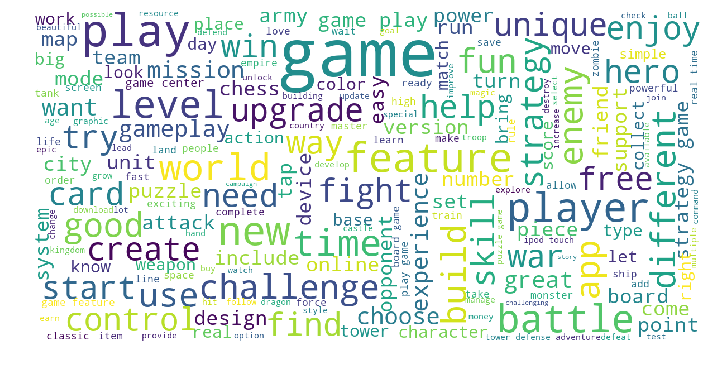

In [19]:
clean.show_wordcloud(lower_scores)

The next two Word Clouds will be for Apps with __greater than or equal to 250 reviews, and those with less than 250 reviews__.

In [20]:
most_reviews = ' '.join(text_sim_set[text_sim_set['User Rating Count'] >= 250].desc_parsed_text.apply(
    lambda x: ' '.join(x)))
less_reviews = ' '.join(text_sim_set[text_sim_set['User Rating Count'] < 250].desc_parsed_text.apply(
    lambda x: ' '.join(x)))

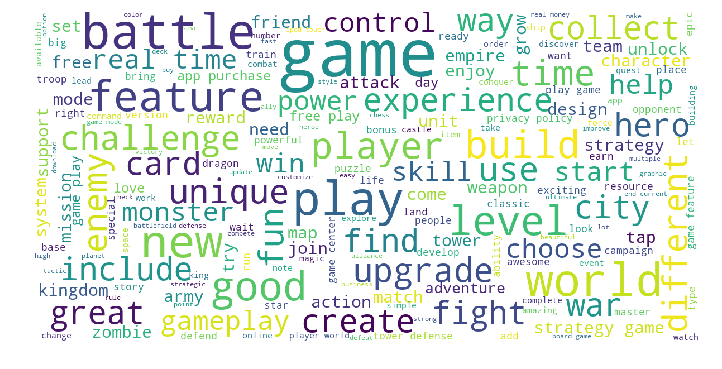

In [21]:
clean.show_wordcloud(most_reviews)

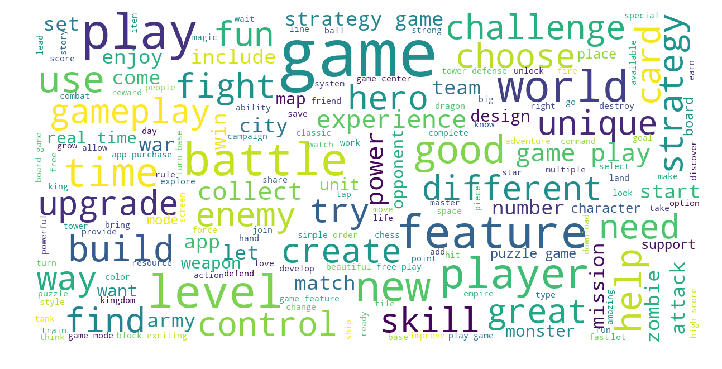

In [22]:
clean.show_wordcloud(less_reviews)

It is interesting that a first glance at the differences in the word clouds seem to be more minor than expected. However, upon reflection this seems to make sense as the descriptions for the apps are heavily influenced by marketing departments which try to hit all of the same buzz words in order to entice new users.

# Part 3: Modeling

Both image comparisons and word clouds were helpful in getting to know the App dataset more thoroughly. However, seeing as word clouds were not quite as sucessful at parsing out differences as expected it would instead be more  interesting to conduct further analysis which is more focused on modeling. Due to time constraints, only a cursory exploration was conducted in this area. 

In order to prep the data for modeling, the __"Languages" and "Genre" fields__ needed to be augmented. In both cases these fields were string representations of arrays which contained all langauges and genres covered by the App. 

To properly encode these fields, they were __parsed into lists and one-hot-encoded__. An example of the parsing is shown below.

In [24]:
text_sim_set.loc[0].Languages

"['DA', 'NL', 'EN', 'FI', 'FR', 'DE', 'IT', 'JA', 'KO', 'NB', 'PL', 'PT', 'RU', 'ZH', 'ES', 'SV', 'ZH']"

In [25]:
ast.literal_eval(text_sim_set.loc[0].Languages)

['DA',
 'NL',
 'EN',
 'FI',
 'FR',
 'DE',
 'IT',
 'JA',
 'KO',
 'NB',
 'PL',
 'PT',
 'RU',
 'ZH',
 'ES',
 'SV',
 'ZH']

Following this, the __K-Means Algorithm__ in Scikit-Learn was leveraged to provide App clusters.

K-Means is unsupervised, and requires the user to specify the number of clusters. In order to quantitatively check the ideal number of clusters the __distortion__ was graphed against the number of clusters. Distortion refers to the __Sum of Squares Error__ within each cluster. This will decrease as the number of clusters increases, however we will see significant dropoff after a certain point.

![title](cleansing/data/clusters.png)

In this case, the ideal number of clusters seems to be five.

However, although the distortion decreases the resulting clusters are not useful. 99% of the data actually falls within a single cluster, leaving hardly any data points in the remaining four clusters. Investigating this led to noticing that the __segmentation seemed to be taking place mostly on the basis of the number of user ratings__.

![title](cleansing/data/cluster_explain.png)

The two clusters pictured above are the only ones with more than 25 data points. As there are nearly 17,000 results, the others are negligable, and appear as the limit on the x-axis is extended. 

However, this shows that __as you increase the User Rating Count you can see exactly where the shift from one cluster to another occurs__. As this field is very skewed it makes sense that the model picked this up above all else.

Seeing as the User Rating Count seems to have dramatically impacted the model, __this feature was removed in subsequent iterations__.

The Distortion Plot was re-created without the User Rating Count feature, and still recommended 5 clusters. The same plot as above is shown below after the model re-ran.

![title](cleansing/data/cluster_2.png)

This clustering is much more meaningful as it is surfacing relationships which are not as obvious this time around. Additionally, there is now no longer a single cluster which dominates the others, there is a far more even distribution among the clusters.

Now with more reliable clusters, the next steps would be to augment the existing data with the cluster each app falls into, as well as its __distance from the centroid__ (center of the cluster).

Following this, the text features parsed earlier could be expanded upon in an attempt to derive more signal for a final model. The eventual intent would most likely be to predict the rating of an app based on the features covered so far in this study as well as those which would be uncovered in the future. 

However, even without predicting price the clustering can be useful as an App can be taken and its cluster and nearest neighbors found. In this manner we can provide initial user recommendations given they either like or dislike a particular app.

## Next Steps

As previously mentioned, I believe there is room to expand the analysis done on the App data, particularly in the modeling space. I would segment the ideas I would like to pursue in the future as follows:

1. Look further into the description text for meaningful features. Some examples below:
    - Polarity
    - Subjectivity
    - Leverage the entities extracted through Spacy
    - Word embeddings

2. Refine the clustering algorithm, continuing to experiment on different subsets of the feature space
3. Refine image similarity parser and add this as a potential feature into the model

## Lessons Learned

I have never worked with images much which was the main reason why this was the initial focus of the project. However, although a passable comparison can be done fairly easily, it is possible to dive extremely deep depending on how precise you want to be. I wish I had more time to look into this more closely, but did not at present.